This Jupyter Notebook access the Allen Institute's Cell Type Database based on example script provided by Allen SDK (cell_types.ipynb). 

In [1]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
from allensdk.core.cell_types_cache import ReporterStatus as RS

from neuron_morphology.features.size import total_volume
from neuron_morphology.swc_io import morphology_from_swc
from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.data import MorphologyLike
from neuron_morphology.feature_extractor.data import get_morphology

import pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pylmeasure import getOneMeasure

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

In [3]:
ctc = CellTypesCache(manifest_file='../data/cell_types/manifest.json')

# Morphology

In [4]:
# human cells with full reconstructions
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
full_human_cells = list(filter(lambda cell: cell['reconstruction_type'] == 'full', human_cells))
# get mouse cells with full reconstructions 
mouse_cells = ctc.get_cells(species=[CellTypesApi.MOUSE])
full_mouse_cells = list(filter(lambda cell: cell['reconstruction_type'] == 'full', mouse_cells))

In [ ]:
# Understanding the data structure
# len(full_human_cells)
# len(full_mouse_cells)
# pd.DataFrame(full_human_cells)
# pd.DataFrame(full_mouse_cells)
# set(pd.DataFrame(full_human_cells)['structure_area_abbrev'])
# set(pd.DataFrame(full_human_cells)['structure_layer_name'])
# set(pd.DataFrame(full_human_cells)['disease_state'])
# set(pd.DataFrame(full_mouse_cells)['structure_layer_name'])
# set(pd.DataFrame(full_mouse_cells)['structure_area_abbrev'])
# set(pd.DataFrame(full_mouse_cells)['transgenic_line'])

In [8]:
# Calculating the total volume of the neuron 
# based on the reconstruction with two different methods
df = pd.DataFrame(columns=['Cell_ID','Total_Volume','L_Measure_Volume'])
for i, cell in enumerate(full_mouse_cells[0:3]):
    reconstruction = ctc.get_reconstruction(cell['id'])
    path = '../data/cell_types/specimen_'+str(cell['id'])+'/reconstruction.swc'
    lmeasure = getOneMeasure('Volume',path)['TotalSum']
    morphology = morphology_from_swc(path)
    data = Data(morphology)
    volume = total_volume(data)
    df = df.append(
        {
            'Cell_ID':cell['id'],
            'Total_Volume':volume,
            'L_Measure_Volume':lmeasure
        }, ignore_index=True)

In [9]:
df

,Cell_ID,Total_Volume,L_Measure_Volume
0,555241040.0,3149.566951,3420.16
1,530737765.0,3417.700939,3060.25
2,584872371.0,1615.318717,1649.62


In [15]:
morpho_features = ctc.get_morphology_features()

# Electrophysiology

In [26]:
mouse_cell_ids=list([cell['id'] for cell in mouse_cells])

In [30]:
units = ctc.get_units()

AttributeError: 'CellTypesCache' object has no attribute 'get_units'

In [10]:
ephys_features = ctc.get_ephys_features()

In [29]:
pd.DataFrame(ephys_features).columns

Index(['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_ramp', 'slow_trough_v_short_square', 'specimen_id',
       'tau', 'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_square', 'threshold_v_ramp',
       'threshold

In [13]:
pd.DataFrame(ephys_features)['id']

0       529951870
1       549196534
2       579986979
3       439816233
4       515191763
          ...    
2328    569957302
2329    573464735
2330    576324611
2331    520471458
2332    396488652
Name: id, Length: 2333, dtype: int64

In [148]:
pd.DataFrame(morpho_features)['id']

0      491119743
1      546781359
2      537042261
3      689123605
4      657879305
         ...    
696    841869334
697    496163999
698    675799126
699    667319659
700    846083117
Name: id, Length: 701, dtype: int64

In [14]:
list(set(pd.DataFrame(ephys_features)['id'].to_list()) & set(pd.DataFrame(morpho_features)['id'].to_list()))

NameError: name 'morpho_features' is not defined

In [27]:
data_set = ctc.get_ephys_data(mouse_full_cells[0]['id'])

NameError: name 'mouse_full_cells' is not defined

In [101]:
data_set

In [100]:
# set(data_set.get_sweep_numbers())

/opt/anaconda3/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/opt/anaconda3/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/opt/anaconda3/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/opt/anaconda3/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/opt/anaconda3/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:135: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead

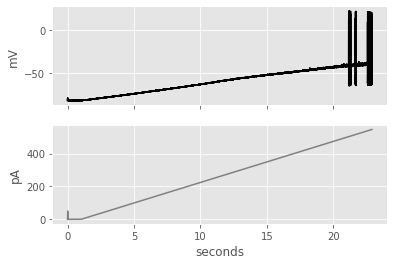

In [41]:
sweep_number = 7
sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("mV")
axes[1].set_ylabel("pA")
axes[1].set_xlabel("seconds")
plt.show()

In [42]:
data_set.get_spike_times(7)

/opt/anaconda3/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:255: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  return f[ds].value


array([21.15248, 21.1658 , 21.1768 , 21.1867 , 21.19884, 21.20948,
       21.22326, 21.24216, 21.25182, 21.26696, 21.28198, 21.29128,
       21.65632, 21.66808, 21.6775 , 21.68878, 21.69856, 21.70968,
       22.57226, 22.5817 , 22.5916 , 22.6025 , 22.61376, 22.62304,
       22.63244, 22.6412 , 22.65126, 22.66142, 22.66892, 22.67926,
       22.6891 , 22.6981 , 22.70998, 22.71802, 22.72996, 22.73856,
       22.74922, 22.757  , 22.76706, 22.77808, 22.78888, 22.79782,
       22.80806, 22.8203 , 22.82934, 22.8418 , 22.8513 , 22.86902,
       22.87772, 22.89334])

In [104]:
type(sweep_data)

dict

In [25]:
sweep_data.keys

NameError: name 'sweep_data' is not defined